For Binary Classification

In [8]:
############################ For regression: f_regression, mutual_info_regression
############################ For classification: chi2, f_classif, mutual_info_classif
from sklearn.decomposition import PCA, LatentDirichletAllocation
from sklearn.metrics import r2_score, confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import numpy as np
import pandas as pd
import seaborn as sns
import category_encoders as ce
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE, ADASYN
%matplotlib inline
from sklearn.linear_model import RidgeCV
from sklearn.feature_selection import SelectFromModel, SelectKBest, f_regression, f_classif, mutual_info_classif, mutual_info_regression
from time import time

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
df = pd.read_csv('cancer.csv')

In [11]:
df = df.drop(['id'], axis='columns')


In [12]:
df.head(10)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,M
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,M
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,M
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,M
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,M


In [13]:

# FEATURES FROM RIDGECV + SELECTFROMMODEL METHOD
#df = df[['compactness_mean','concave points_mean','smoothness_se','concavity_se','concave points_se','fractal_dimension_se','fractal_dimension_worst','diagnosis']]    
# FEATURES FROM RIDGECV METHOD
#df = df[['compactness_mean','smoothness_se','concave points_se','fractal_dimension_se','fractal_dimension_worst','concavity_se','diagnosis']]

In [14]:
np.array(df.columns)

array(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se',
       'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst', 'diagnosis'], dtype=object)

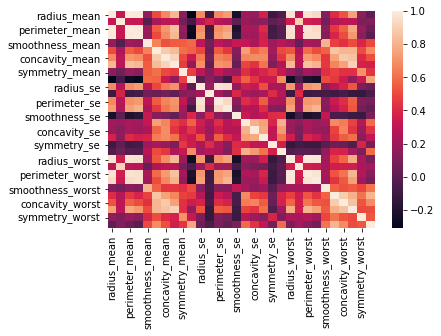

In [15]:
sns.heatmap(df.corr())

In [16]:
enc = ce.OneHotEncoder(use_cat_names=True)
df_enc = enc.fit_transform((df['diagnosis']))


In [17]:
df_enc
df = df.join(df_enc)

In [18]:
#df['diagnosis'].replace(['M','B'], [1,0], inplace = True)
df.head(10)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis,diagnosis_M,diagnosis_B
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M,1,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M,1,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M,1,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M,1,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M,1,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,M,1,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,M,1,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,M,1,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,M,1,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,M,1,0


In [19]:
df = df.drop(['diagnosis'], axis='columns')

In [21]:
df.tail(10)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M,diagnosis_B
559,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,0.06570,...,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732,0,1
560,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,...,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321,0,1
561,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,0.05502,...,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905,0,1
562,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,0.2128,0.07152,...,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090,1,0
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,179.10,1819.0,0.14070,0.41860,0.6599,0.25420,0.2929,0.09873,1,0
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115,1,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637,1,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820,1,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400,1,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039,0,1


In [22]:
#Y = df.iloc[:, 1].values
#Y =  df["diagnosis"].values
Y = df.iloc[:, 31].values
print(Y.shape)
print(type(Y))
print(Y)

(569,)
<class 'numpy.ndarray'>
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 

In [23]:
X = df.iloc[:, 0:31].values
print(X.shape)
print(type(X))
print(X)

(569, 31)
<class 'numpy.ndarray'>
[[1.799e+01 1.038e+01 1.228e+02 ... 4.601e-01 1.189e-01 1.000e+00]
 [2.057e+01 1.777e+01 1.329e+02 ... 2.750e-01 8.902e-02 1.000e+00]
 [1.969e+01 2.125e+01 1.300e+02 ... 3.613e-01 8.758e-02 1.000e+00]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 2.218e-01 7.820e-02 1.000e+00]
 [2.060e+01 2.933e+01 1.401e+02 ... 4.087e-01 1.240e-01 1.000e+00]
 [7.760e+00 2.454e+01 4.792e+01 ... 2.871e-01 7.039e-02 0.000e+00]]


In [235]:
# IMP = pd.DataFrame(importance) 
# #print(IMP)
# FEATNAMES =  pd.DataFrame(feature_names)
# #print(FEATNAMES)
# frames = [IMP, FEATNAMES]
# result = pd.concat([IMP, FEATNAMES], axis=1)
# (result)

# CONSIDERING FEATURES FROM RIDGECV
# - compactness_mean
# - smoothness_se
# - concave points_se
# - fractal_dimension_se
# - fractal_dimension_worst
# - concavity_se

In [236]:
# sm = SMOTE(random_state=42)
# X_res, Y_res = sm.fit_resample(X, Y)

In [237]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, Y_train, Y_test = train_test_split(X_res,Y_res, test_size=0.2, random_state=42)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [25]:
X_train.shape

(455, 31)

In [26]:
X_test.shape

(114, 31)

In [27]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(type(X_train))
print(type(Y_train))

(455, 31)
(114, 31)
(455,)
(114,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [28]:
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[-0.46649743, -0.13728933, -0.44421138, ...,  0.17275669,
         0.20372995, -0.76870611],
       [ 1.36536344,  0.49866473,  1.30551088, ..., -0.561211  ,
        -1.00838949,  1.30088727],
       [ 0.38006578,  0.06921974,  0.40410139, ..., -0.10783139,
        -0.20629287,  1.30088727],
       ...,
       [-0.73547237, -0.99852603, -0.74138839, ..., -0.3820785 ,
        -0.32408328, -0.76870611],
       [ 0.02898271,  2.0334026 ,  0.0274851 , ..., -1.60905688,
        -0.33137507, -0.76870611],
       [ 1.87216885,  2.80077153,  1.80354992, ..., -0.05868885,
        -0.09467243,  1.30088727]])

In [29]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,0.08046,...,22.65,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750,0.0
1,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,0.07398,...,33.48,176.50,2089.0,0.14910,0.75840,0.67800,0.29030,0.4098,0.12840,1.0
2,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,0.06963,...,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490,0.0
3,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,...,35.19,77.98,455.7,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147,0.0
4,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,0.06960,...,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,0.08980,...,15.67,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840,0.0
451,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,0.06520,...,29.26,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097,0.0
452,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,0.05376,...,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120,0.0
453,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,0.06544,...,30.80,113.90,869.3,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550,1.0


In [30]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,12.47,18.60,81.09,481.9,0.09965,0.10580,0.08005,0.03821,0.1925,0.06373,...,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.10150,0.3014,0.08750,0.0
1,18.94,21.31,123.60,1130.0,0.09009,0.10290,0.10800,0.07951,0.1582,0.05461,...,26.58,165.90,1866.0,0.1193,0.2336,0.2687,0.17890,0.2551,0.06589,1.0
2,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,0.1931,0.05796,...,26.00,124.90,1156.0,0.1546,0.2394,0.3791,0.15140,0.2837,0.08019,1.0
3,12.40,17.68,81.47,467.8,0.10540,0.13160,0.07741,0.02799,0.1811,0.07102,...,22.91,89.61,515.8,0.1450,0.2629,0.2403,0.07370,0.2556,0.09359,0.0
4,11.54,14.44,74.65,402.9,0.09984,0.11200,0.06737,0.02594,0.1818,0.06782,...,19.68,78.78,457.8,0.1345,0.2118,0.1797,0.06918,0.2329,0.08134,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,14.64,16.85,94.21,666.0,0.08641,0.06698,0.05192,0.02791,0.1409,0.05355,...,25.44,106.00,831.0,0.1142,0.2070,0.2437,0.07828,0.2455,0.06596,0.0
110,16.07,19.65,104.10,817.7,0.09168,0.08424,0.09769,0.06638,0.1798,0.05391,...,24.56,128.80,1223.0,0.1500,0.2045,0.2829,0.15200,0.2650,0.06387,1.0
111,11.52,14.93,73.87,406.3,0.10130,0.07808,0.04328,0.02929,0.1883,0.06168,...,21.19,80.88,491.8,0.1389,0.1582,0.1804,0.09608,0.2664,0.07809,0.0
112,14.22,27.85,92.55,623.9,0.08223,0.10390,0.11030,0.04408,0.1342,0.06129,...,40.54,102.50,764.0,0.1081,0.2426,0.3064,0.08219,0.1890,0.07796,0.0


In [31]:
pca = PCA(n_components=15)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [32]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-684.157577,-55.264963,18.580364,7.182495,-3.907507,0.875426,-0.444553,0.138920,0.430336,-0.680872,0.173114,0.950971,0.520161,-0.202110,0.166114
1,1379.328522,-75.106080,-35.875701,-2.648583,-2.879251,-5.205899,-0.566861,0.222544,0.574774,-0.428980,-0.387881,0.353930,-0.151897,0.176793,-0.051707
2,-690.800046,-38.583961,24.579553,9.004761,0.162316,1.749149,0.306994,1.208215,0.257614,0.107641,0.467977,0.034936,-0.061096,0.033108,0.052753
3,-521.642299,-41.776807,7.097357,-4.462692,-12.787180,0.550214,0.396400,-0.405478,-0.080598,0.056532,-0.214972,0.047462,-0.113723,-0.006849,0.071900
4,-613.490928,-25.440126,30.877130,7.839805,2.129445,-0.328317,-0.855543,0.798378,-0.189954,-0.228935,-0.010231,-0.070062,-0.006468,0.100530,0.112778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,-721.501839,-39.375810,28.433745,10.886989,1.696205,-0.379069,-1.867628,0.803402,0.210937,-0.866413,-0.267330,0.091560,-0.162979,-0.014415,-0.044004
451,-430.612608,-20.240277,5.279376,-2.335210,-3.244285,0.812362,2.659552,0.379655,0.038500,0.014962,-0.309833,0.105432,0.021129,-0.007352,-0.015350
452,-177.104482,81.908704,-20.402445,7.178765,0.212366,-1.037688,-0.211268,-0.514673,-0.131237,0.178946,-0.074906,-0.120077,0.070699,0.010089,0.013713
453,-36.019813,-43.117391,-19.353235,-7.674369,1.050641,2.005093,1.615607,-0.731308,-0.180141,-0.148931,0.341198,-0.095906,-0.029506,-0.051457,-0.033036


In [33]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-260.499445,-42.731046,5.628023,-1.677108,1.849625,-0.363366,-0.102494,-0.226361,-0.303895,0.151021,-0.171462,0.270015,-0.103080,-0.038867,0.011817
1,1095.159685,-112.461396,-4.129309,-1.062140,4.646029,1.428599,-2.468351,-0.263853,-0.699726,0.325952,0.158286,-0.113578,-0.039221,-0.054285,-0.030439
2,287.945606,-65.493271,-7.275542,-2.307324,3.510959,-1.611980,0.131337,-0.281938,-0.339664,-0.348447,0.197282,-0.015882,-0.086486,-0.118821,0.004370
3,-406.678129,30.135293,-2.484554,-1.609303,2.814734,-0.488632,-0.059154,0.410932,0.739363,0.151579,-0.091990,-0.155514,0.021678,0.012302,-0.021232
4,-490.261689,5.271666,8.968705,5.682084,2.672806,-1.376788,1.300445,0.381730,0.359296,0.238121,0.340488,0.039772,-0.015865,0.000093,-0.043717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,-34.108470,33.749428,-18.945011,1.467794,0.751080,0.079309,1.949878,-0.274790,-0.133836,0.258901,-0.296355,0.102220,0.021161,-0.033445,-0.038785
110,382.753591,-41.486344,17.993440,-3.040287,4.537494,-0.638272,-0.880275,0.006708,-0.789241,-0.223321,0.168131,-0.111371,0.068020,-0.038978,-0.008577
111,-459.658528,-9.803889,5.291115,5.296501,1.540329,-0.195602,1.177327,-0.017599,0.047987,-0.117661,-0.141178,0.005120,0.000926,-0.023283,0.009581
112,-112.562221,33.071931,-5.182124,-11.938072,-13.388747,-1.590086,2.374873,0.165332,0.200050,0.530467,-0.277438,0.145580,0.012008,-0.083569,-0.063734


In [34]:
X_train.shape

(455, 15)

In [35]:
X_test.shape

(114, 15)

In [36]:
from sklearn.linear_model import LogisticRegression
lrRegression =  LogisticRegression(max_iter=500)

In [37]:
lrRegression.fit(X_train,Y_train)

LogisticRegression(max_iter=500)

In [38]:
Y_Pred_TEST = lrRegression.predict(X_test)
Y_Pred_TRAIN = lrRegression.predict(X_train)

# print(" ACCURACY SCORE FOR TEST DATA : ",lrRegression.score(Y_test, Y_Pred_TEST))
# print(" ACCURACY SCORE FOR TRAIN DATA : ",lrRegression.score(Y_train, Y_Pred_TRAIN))
#Y_Pred = lrRegression.predict(X_test[0].reshape(1,-1))

# for one value prediction
#print(lrRegression.predict(X_test[0].reshape(1,-1)))

# for multiple value prediction
#print(lrRegression.predict(X_test[0:10]))

In [41]:
print(Y_Pred_TEST.shape)
print(Y_Pred_TRAIN.shape)

(114,)
(455,)


In [42]:
acc =  accuracy_score(Y_test, Y_Pred_TEST)
acc2 = accuracy_score(Y_train, Y_Pred_TRAIN)
print("TEST DATA PRedict : ", acc)
print("TRAIN DATA PRedict : ",acc2)

TEST DATA PRedict :  1.0
TRAIN DATA PRedict :  0.9978021978021978


# WITH STANDARD SCALER APPROACH AND PCA  COMPONENTS = 15
TEST DATA PRedict :  1.0
TRAIN DATA PRedict :  0.9978021978021978

# WITH STANDARD SCALER APPROACH NON PCA
#FROM STEP SELECTKBEST WHEN K = 7 TEST DATA 
TEST DATA PRedict :  0.9824561403508771
TRAIN DATA PRedict :  0.9340659340659341

# WITHOUTSTANDAARD SCALER APPROACH
#FROM STEP SELECTKBEST WHEN K = 7
TEST DATA PRedict :  0.9824561403508771
TRAIN DATA PRedict :  0.9340659340659341

In [43]:
from sklearn.metrics import confusion_matrix, r2_score, accuracy_score
#TEST CONFUSION MATRIX
cm = confusion_matrix(Y_test, Y_Pred_TEST)
cm

array([[43,  0],
       [ 0, 71]])

In [44]:
#TRAIN CONFUSION MATRIX
cm = confusion_matrix(Y_train, Y_Pred_TRAIN)
cm

array([[168,   1],
       [  0, 286]])

In [45]:
# PREVIOUS REPORT WITH STANDARD SCALER
classreport=  classification_report(Y_test, Y_Pred_TEST)
print(classreport)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        71

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



# PREVIOUS REPORT WITHOUT STANDARD SCALER
 precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

# PREVIOUS REPORT FROM SELECTKBEST 
 precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


In [46]:
classreport2 =  classification_report(Y_train, Y_Pred_TRAIN)
print(classreport2)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       169
           1       1.00      1.00      1.00       286

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



PREVIOUS REPORT FROM SELECTKBEST
 precision    recall  f1-score   support

           0       0.94      0.96      0.95       286
           1       0.93      0.89      0.91       169

    accuracy                           0.93       455
   macro avg       0.93      0.93      0.93       455
weighted avg       0.93      0.93      0.93       455

In [47]:
score = lrRegression.score(X_test, Y_test)
score

1.0

prev 1 accuracy
0.9824561403508771

Text(0.5,1,'Accuracy Score: 1.0')

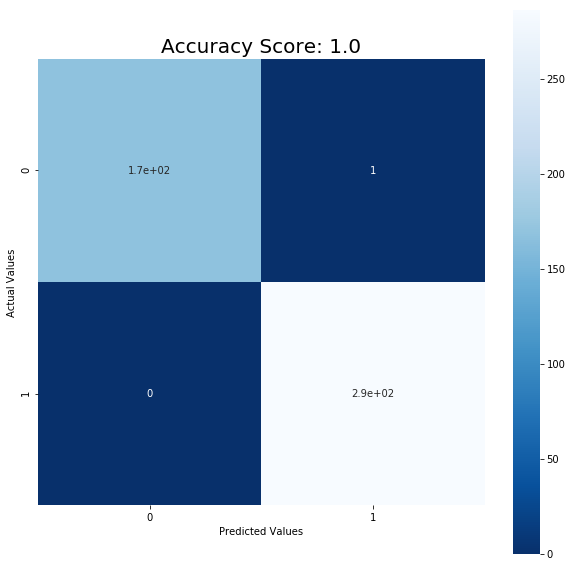

In [48]:
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, cmap='Blues_r', square=True)
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
all_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_title,  size=20)

In [49]:
lrRegression.coef_

array([[-1.29208230e-02,  1.97159457e-02, -3.54982551e-02,
         2.99135641e-01,  3.79686261e-02, -7.58509674e-02,
        -3.22825622e-01,  5.17530486e-02,  1.82214514e-01,
         3.24465863e+00, -2.59779842e+00,  9.81573953e-01,
        -9.47558778e-02,  2.64444589e-03, -3.49144099e-02]])

In [50]:
lrRegression.intercept_

array([0.19010511])